**Create CNN Model and Optimize it using Keras Tuner**

In [1]:
!pip install keras-tuner

     |████████████████████████████████| 71kB 6.0MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp36-none-any.whl size=78939 sha256=2d0f8d68e2dcc208dd78195be037806a2adab918c0e43b6360cb85e19a3c1da7
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15358 sha256=46a24035ccf9a3164c4418583f402659b720594f71a5c6a1e4f6af3bc428c242
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models


In [3]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
(train_images,train_labels),(test_images,test_labels)= datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [5]:
train_images.shape, train_labels.shape

((50000, 32, 32, 3), (50000, 1))

In [6]:
test_images.shape, test_labels.shape

((10000, 32, 32, 3), (10000, 1))

Here we see there are 50000 training images and 10000 test images.

In [7]:
train_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
train_labels[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

**train_labels is a 2D array, for our classification having 1D array is good enough, so I've converted this to 1D array**

In [9]:
train_labels= train_labels.reshape(-1,)
train_labels[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
test_labels= test_labels.reshape(-1,)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

**Function to plot samples**

In [13]:
def plot_image(x, y, index):
  plt.figure(figsize=(14,5))
  plt.matshow(x[index])
  plt.xlabel(classes[y[index]])

<Figure size 1008x360 with 0 Axes>

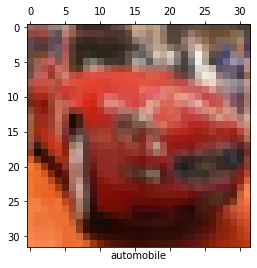

In [14]:
plot_image(train_images, train_labels, 5)

**Normalization of data** 

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, I've divided it by 255.

In [15]:
train_images= train_images/255
test_images= test_images/255

In [16]:
train_images[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

**CNN Model**

In [17]:
classifier= models.Sequential([
                               
                               #CNN
                               layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape= (32,32,3)),
                               layers.MaxPooling2D((2,2)),
                               layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
                               layers.MaxPooling2D((2,2)),
                               
                               # Dense
                               layers.Flatten(),
                               layers.Dense(20, activation='relu'),
                               layers.Dense(10, activation=  'softmax')
])

In [18]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 20)                23060     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [19]:
classifier.compile(loss= 'sparse_categorical_crossentropy',
                   optimizer= 'adam',
                   metrics= ['accuracy']
                   )

In [20]:
classifier.fit(train_images, train_labels, epochs= 10)

Epoch 1/10
1563/1563 [==============================] - 11s 3ms/step - loss: 1.8493 - accuracy: 0.3149
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3379 - accuracy: 0.5202
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.1941 - accuracy: 0.5758
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.1046 - accuracy: 0.6062
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.0370 - accuracy: 0.6347
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.9995 - accuracy: 0.6474
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.9412 - accuracy: 0.6713
Epoch 8/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.9167 - accuracy: 0.6772
Epoch 9/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.8804 - accuracy: 0.6945
Epoch 10/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.86

In [21]:
predictions= classifier.predict(test_images)
predictions[:5]

array([[3.7967856e-04, 1.0395546e-04, 3.1301640e-03, 8.1454861e-01,
        2.3063782e-03, 8.7293141e-02, 6.4317761e-03, 1.5124492e-04,
        8.3416805e-02, 2.2382427e-03],
       [8.1547583e-03, 2.5325337e-02, 3.7664431e-05, 6.3816324e-06,
        1.4431204e-06, 2.5097268e-07, 3.1240976e-08, 9.2839355e-06,
        9.6057868e-01, 5.8862017e-03],
       [7.9430945e-02, 2.1847115e-01, 1.8283329e-03, 2.2056683e-03,
        6.6703785e-04, 1.4654595e-04, 2.5688263e-04, 1.0461174e-03,
        6.5255016e-01, 4.3397147e-02],
       [7.6506662e-01, 5.3185285e-03, 4.9367868e-03, 3.0542586e-03,
        1.9797098e-02, 4.9818878e-05, 3.7592821e-04, 2.9888932e-04,
        1.9820729e-01, 2.8948372e-03],
       [2.4165038e-05, 2.1950247e-05, 4.7675725e-02, 1.3723306e-01,
        7.8286760e-02, 7.4194126e-02, 6.6164589e-01, 2.5652224e-04,
        5.5835739e-04, 1.0345998e-04]], dtype=float32)

In [22]:
y_pred= [np.argmax(i) for i in predictions]
y_pred[:5]

[3, 8, 8, 0, 6]

<Figure size 1008x360 with 0 Axes>

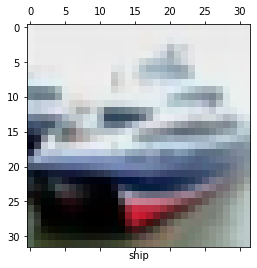

In [23]:
plot_image(test_images, test_labels, 1)

In [24]:
classes[y_pred[1]]

'ship'

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
cm= confusion_matrix(test_labels, y_pred)
cm

array([[679,  12,  69,  34,  10,   4,   5,  14, 103,  70],
       [ 28, 693,  10,  18,   4,   3,  10,   4,  44, 186],
       [ 62,   4, 544,  72,  76,  93,  74,  33,  23,  19],
       [ 14,   8,  50, 546,  68, 176,  61,  27,  23,  27],
       [ 19,   2,  85,  97, 598,  46,  61,  65,  23,   4],
       [ 11,   3,  57, 192,  46, 598,  18,  50,  14,  11],
       [  6,   3,  46,  86,  47,  22, 758,   9,  14,   9],
       [ 13,   1,  40,  52,  73,  68,   0, 713,   8,  32],
       [ 63,  19,  12,  18,   5,   4,   4,   4, 828,  43],
       [ 27,  40,   5,  22,  13,   6,   8,  16,  38, 825]])

In [26]:
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.68      0.71      1000
           1       0.88      0.69      0.78      1000
           2       0.59      0.54      0.57      1000
           3       0.48      0.55      0.51      1000
           4       0.64      0.60      0.62      1000
           5       0.59      0.60      0.59      1000
           6       0.76      0.76      0.76      1000
           7       0.76      0.71      0.74      1000
           8       0.74      0.83      0.78      1000
           9       0.67      0.82      0.74      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



**Optimization using Keras Tuner**

In [50]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(32,32,3)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=20, max_value=80, step=16),
        activation='relu'
    ),
     keras.layers.Dense(
        units=hp.Int('dense_2_units', min_value=20, max_value=70, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [51]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [52]:
tuner=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='cls',project_name="image")

In [53]:
tuner.search(train_images, train_labels, epochs= 3, validation_split= 0.35)

Trial 5 Complete [00h 00m 17s]
val_accuracy: 0.5613142848014832

Best val_accuracy So Far: 0.6112571358680725
Total elapsed time: 00h 01m 55s
INFO:tensorflow:Oracle triggered exit


In [54]:
clss= tuner.get_best_models(num_models=1)[0]
clss.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 112)       64624     
_________________________________________________________________
flatten (Flatten)            (None, 87808)             0         
_________________________________________________________________
dense (Dense)                (None, 52)                4566068   
_________________________________________________________________
dense_1 (Dense)              (None, 68)                3604      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                690       
Total params: 4,636,778
Trainable params: 4,636,778
Non-trainable params: 0
______________________________________________

In [55]:
clss.fit(train_images, train_labels, validation_split=0.35, epochs= 10,  initial_epoch= 3)

Epoch 4/10
1016/1016 [==============================] - 8s 7ms/step - loss: 0.7055 - accuracy: 0.7533 - val_loss: 1.1658 - val_accuracy: 0.6015
Epoch 5/10
1016/1016 [==============================] - 7s 7ms/step - loss: 0.5319 - accuracy: 0.8137 - val_loss: 1.2607 - val_accuracy: 0.6187
Epoch 6/10
1016/1016 [==============================] - 7s 7ms/step - loss: 0.3504 - accuracy: 0.8817 - val_loss: 1.4196 - val_accuracy: 0.6112
Epoch 7/10
1016/1016 [==============================] - 7s 7ms/step - loss: 0.2278 - accuracy: 0.9224 - val_loss: 1.7714 - val_accuracy: 0.6053
Epoch 8/10
1016/1016 [==============================] - 7s 7ms/step - loss: 0.1534 - accuracy: 0.9497 - val_loss: 2.0882 - val_accuracy: 0.5931
Epoch 9/10
1016/1016 [==============================] - 7s 7ms/step - loss: 0.1278 - accuracy: 0.9563 - val_loss: 2.4363 - val_accuracy: 0.5986
Epoch 10/10
1016/1016 [==============================] - 7s 7ms/step - loss: 0.0991 - accuracy: 0.9653 - val_loss: 2.4459 - val_accuracy

In [56]:
pred= clss.predict(test_images)
pred[:5]

array([[5.2469272e-06, 2.1357754e-07, 4.4023876e-05, 6.1403471e-01,
        8.1607006e-08, 3.9967084e-03, 7.7688783e-05, 7.1593135e-04,
        3.8084057e-01, 2.8487071e-04],
       [8.4063726e-07, 8.0027879e-05, 2.8846567e-17, 3.5362571e-13,
        9.1984951e-16, 1.8294850e-16, 8.1880117e-19, 1.1950544e-17,
        9.9991667e-01, 2.4741539e-06],
       [9.2456603e-01, 8.5223960e-03, 1.2678282e-05, 8.7519860e-05,
        1.8673787e-04, 3.5109566e-05, 1.1608859e-06, 6.7353467e-05,
        3.0685689e-03, 6.3452430e-02],
       [1.3365351e-01, 1.2443977e-04, 2.2068007e-04, 8.9741093e-07,
        1.6639593e-06, 4.4445212e-08, 6.5935190e-08, 4.5975490e-09,
        8.6589837e-01, 1.0030075e-04],
       [2.6986634e-16, 3.2070757e-10, 5.6556559e-07, 1.9110007e-06,
        1.7151891e-04, 1.6597892e-07, 9.9982589e-01, 2.4127710e-13,
        4.0308170e-09, 1.1227978e-14]], dtype=float32)

In [57]:
ypred= [np.argmax(i) for i in pred]
ypred[:5]

[3, 8, 0, 8, 6]

In [58]:
print(classification_report(test_labels, ypred))

              precision    recall  f1-score   support

           0       0.62      0.67      0.64      1000
           1       0.73      0.70      0.71      1000
           2       0.42      0.51      0.46      1000
           3       0.42      0.38      0.40      1000
           4       0.54      0.46      0.49      1000
           5       0.51      0.50      0.50      1000
           6       0.59      0.79      0.67      1000
           7       0.71      0.58      0.64      1000
           8       0.81      0.60      0.69      1000
           9       0.63      0.71      0.67      1000

    accuracy                           0.59     10000
   macro avg       0.60      0.59      0.59     10000
weighted avg       0.60      0.59      0.59     10000

